In [1]:
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [10, 7]

# 1. Plot: contour plot y=size, x=time, col=concentration

In [4]:
data = xr.open_dataset('NEWOUT_ASTroCAT_10y_x9res.nc')

In [5]:
data

<xarray.Dataset>
Dimensions:             (component: 81, flexComponent: 40, time: 32850)
Coordinates:
  * time                (time) float64 1.0 1.111 1.222 ... 3.65e+03 3.65e+03
Dimensions without coordinates: component, flexComponent
Data variables:
    Z__zeta             int64 ...
    P__PMinEsd          int64 ...
    Z__epsilon          float64 ...
    Z__KsZ              int64 ...
    Z__deltaxprey       float64 ...
    N__supplyrate       int64 ...
    P__m                float64 ...
    P__NP               int64 ...
    N__component_label  object ...
    P__component_label  object ...
    Z__f_eg             float64 ...
    Z__component_label  object ...
    N__initVal          int64 ...
    P__PMaxEsd          int64 ...
    P__initVal          int64 ...
    Z__initVal          int64 ...
    env__stateout       (time, component) float64 ...
    env__component      (component) object ...
    P__size             (flexComponent) float64 ...
    Z__size             (flexComponent) float64 ...

In [9]:
resolution = 9
resmpl_step = 5

In [10]:
model_out = data.set_index(component = 'env__component', P__sizes='P__size', Z__sizes='Z__size')

In [11]:
P_out = model_out.sel(component=['P'+str(i) for i in range(40)])
Z_out = model_out.sel(component=['Z'+str(i) for i in range(40)])
N_out = model_out.sel(component='N')

In [12]:
P_out.time[::resolution]/365

<xarray.DataArray 'time' (time: 3650)>
array([2.73972603e-03, 5.47878483e-03, 8.21784362e-03, ...,
       9.99208716e+00, 9.99482622e+00, 9.99756528e+00])
Coordinates:
  * time     (time) float64 1.0 2.0 3.0 3.999 ... 3.647e+03 3.648e+03 3.649e+03

In [13]:
P_out.env__stateout[::resolution].T

<xarray.DataArray 'env__stateout' (component: 40, time: 3650)>
[146000 values with dtype=float64]
Coordinates:
  * time       (time) float64 1.0 2.0 3.0 ... 3.647e+03 3.648e+03 3.649e+03
  * component  (component) object 'P0' 'P1' 'P2' 'P3' ... 'P37' 'P38' 'P39'

# full plot

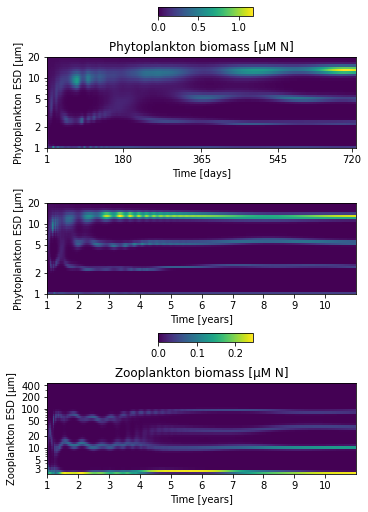

In [20]:
plt.rcParams['figure.figsize'] = [5, 7]

#f1, (ax1col, ax1, ax2, ax2col, ax3) = plt.subplots(5, 3, gridspec_kw={'height_ratios': [.1,1,1,.1,1]})#, sharey='row')

fig = plt.figure(constrained_layout=True)

gs = fig.add_gridspec(nrows=5, ncols=3,
                        hspace=0.1, wspace=0.1, height_ratios=[.1,1,1,.1,1])

ax1col = fig.add_subplot(gs[0, 1])
ax1 = fig.add_subplot(gs[1, 0:3])
ax2 = fig.add_subplot(gs[2, 0:3])
ax3col = fig.add_subplot(gs[3, 1])
ax3 = fig.add_subplot(gs[4, 0:3])


plt.setp(ax1, xticks=[1,180,365,365+180,720])
from matplotlib.ticker import MaxNLocator
for axe in [ax1]:
        axe.grid(True, alpha=0.5)
        axe.get_yaxis().set_major_locator(MaxNLocator(nbins=4))
        #axe.tick_params(top=False, right=True, direction="in")

plt.setp((ax2, ax3), xticks=[1,365,2*365,3*365,4*365,5*365,6*365,7*365,8*365,9*365,10*365])
from matplotlib.ticker import MaxNLocator
for axe in (ax2, ax3):  
        axe.grid(True, alpha=0.5)
        axe.get_yaxis().set_major_locator(MaxNLocator(nbins=4))
        #axe.tick_params(top=False, right=True, direction="in")
        
ax1.set_title('Phytoplankton biomass [µM N]')
ax1plt = ax1.pcolormesh(P_out.time[:365*2*resolution:resmpl_step],P_out.P__sizes,
               P_out.env__stateout[:365*2*resolution:resmpl_step].T, linewidth=0,rasterized=True)
ax1plt
ax1.set_yscale('log')
ax1.set_yticks([1,2,5,10,20])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.colorbar(ax1plt,cax=ax1col, orientation='horizontal')
ax1.set_ylabel('Phytoplankton ESD [µm]')
ax1.set_xlabel('Time [days]')
    
ax2.pcolormesh(P_out.time[::resolution],P_out.P__sizes,P_out.env__stateout[::resolution].T, linewidth=0,rasterized=True)
ax2.set_yscale('log')
ax2.set_yticks([1,2,5,10,20])
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax2.set_ylabel('Phytoplankton ESD [µm]')
ax2.set_xlabel('Time [years]')
ax2.set_xticklabels(labels=[i for i in range(1,11)])

ax3.set_title('Zooplankton biomass [µM N]')
ax3plt = ax3.pcolormesh(Z_out.time[::resolution],Z_out.Z__sizes,Z_out.env__stateout[::resolution].T, linewidth=0,rasterized=True)
ax3plt
ax3.set_yscale('log')
ax3.set_yticks([3,5,10,20,50,100,200,400])
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.colorbar(ax3plt, cax=ax3col, orientation='horizontal')
ax3.set_ylabel('Zooplankton ESD [µm]')
ax3.set_xlabel('Time [years]')
ax3.set_xticklabels(labels=[i for i in range(1,11)])

# Defining custom 'xlim' and 'ylim' values.
xlim = (0, 365*9+364)

# Setting the values for all axes.
plt.setp((ax2, ax3), xlim=xlim)

#f1.align_ylabels()


plt.savefig('../03_chemostat.pdf', bbox_inches='tight')
plt.show()